In [1]:
#importing libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#importing dataset
df = pd.read_csv("C://Users//lenovo//desktop//SAT_Exam.csv")

In [3]:
#checking the head of the dataset
df.head(5)

,General_knowledge,Aptitude,Mathematics,Science,SAT
0,73,71,74,73,144
1,93,90,60,97,186
2,89,94,97,98,182
3,96,93,115,110,208
4,73,68,87,83,157


In [4]:
#checking the tail of the dataset
df.tail(5)

,General_knowledge,Aptitude,Mathematics,Science,SAT
91,80,83,65,65,149
92,90,88,93,98,191
93,93,93,77,72,163
94,80,83,6,3,78
95,77,73,104,102,180


In [5]:
#checking the shape of the data
df.shape

(96, 5)

In [6]:
# we can see there are total of 96 observation and 5 columns. 

In [7]:
#checking the datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   General_knowledge   96 non-null     int64
 1   Aptitude            96 non-null     int64
 2   Mathematics         96 non-null     int64
 3   Science             96 non-null     int64
 4   SAT                 96 non-null     int64
dtypes: int64(5)
memory usage: 3.9 KB


In [8]:
#we can check all the data are intergars and there are no need to make any changes

In [9]:
#checking the null values
df.isnull().sum()

General_knowledge     0
Aptitude              0
Mathematics           0
Science               0
SAT                   0
dtype: int64

In [10]:
## we can check there are no null values in the dataset

In [11]:
#finding the statistics of the data
df.describe()

,General_knowledge,Aptitude,Mathematics,Science,SAT
count,96.000000,96.000000,96.00000,96.000000,96.000000
mean,79.854167,79.916667,76.25000,76.802083,155.968750
std,12.230229,12.189440,22.41569,22.925793,32.427881
min,46.000000,46.000000,6.00000,3.000000,70.000000
25%,74.000000,74.000000,65.00000,65.000000,140.000000
50%,80.000000,81.000000,77.00000,79.000000,157.500000
75%,88.250000,89.000000,90.25000,92.000000,180.000000
max,97.000000,101.000000,125.00000,124.000000,223.000000


In [12]:
#from the stats, we can see there are someoutliers in aptitude, math and science as max is above 100. we will check in the visualation as well.
#mean of the data set is almost same.

In [13]:
#finding the columns of the dataset
df.columns

Index(['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT'], dtype='object')

In [14]:
##Frmo here we can see that there is a space in the string so let's clean it.
print (df.columns.tolist())

df.columns = df.columns.str.strip()
print (df.columns)

['General_knowledge ', 'Aptitude ', 'Mathematics ', 'Science ', 'SAT']
Index(['General_knowledge', 'Aptitude', 'Mathematics', 'Science', 'SAT'], dtype='object')


In [15]:
##from above stats we can see maths and science have min of 6 and 3. lets find it out.
df["Mathematics"].min()

6

In [16]:
##from above stats we can see maths and science have min of 6 and 3. lets find it out.
df["Science"].min()

3

In [17]:
##from above stats we can see maths and science have min of 6 and 3. lets find it out.
df["Science"].max()

124

In [18]:
##from above stats we can see maths and science have min of 6 and 3. lets find it out.
df["Mathematics"].max()

125

C:\Users\lenovo\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


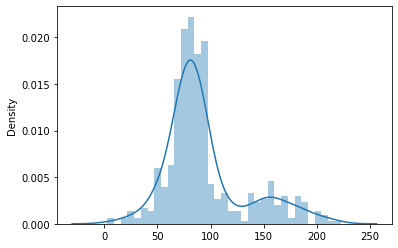

In [19]:
#findng the relation using visulations.
sns.distplot(df)
plt.show()

<AxesSubplot:xlabel='General_knowledge', ylabel='Count'>

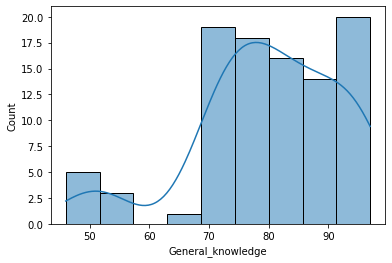

In [20]:
sns.histplot(df['General_knowledge'], kde= True)

<AxesSubplot:xlabel='Aptitude', ylabel='Count'>

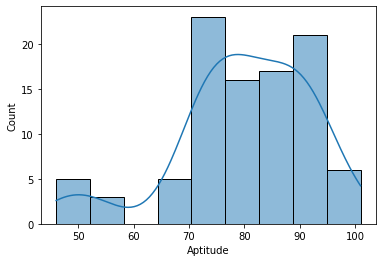

In [21]:
sns.histplot(df['Aptitude'], kde= True)

<AxesSubplot:xlabel='Mathematics', ylabel='Count'>

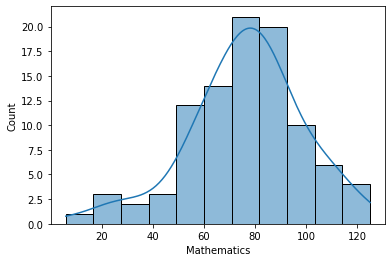

In [22]:
sns.histplot(df['Mathematics'], kde= True)

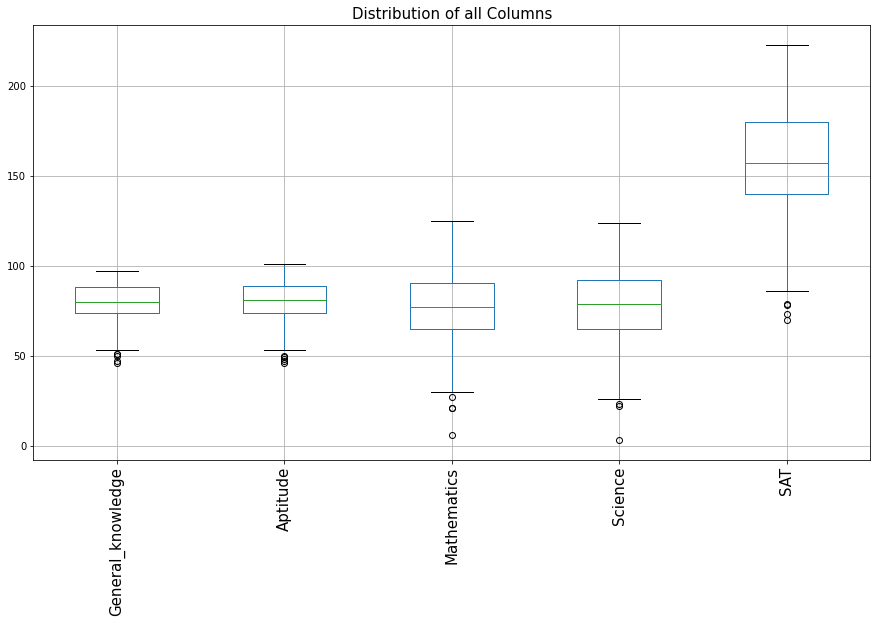

In [23]:
##Outliers analysis.
# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# plot a boxplot to visualize the outliers in all the numeric variables
df.boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of all Columns', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

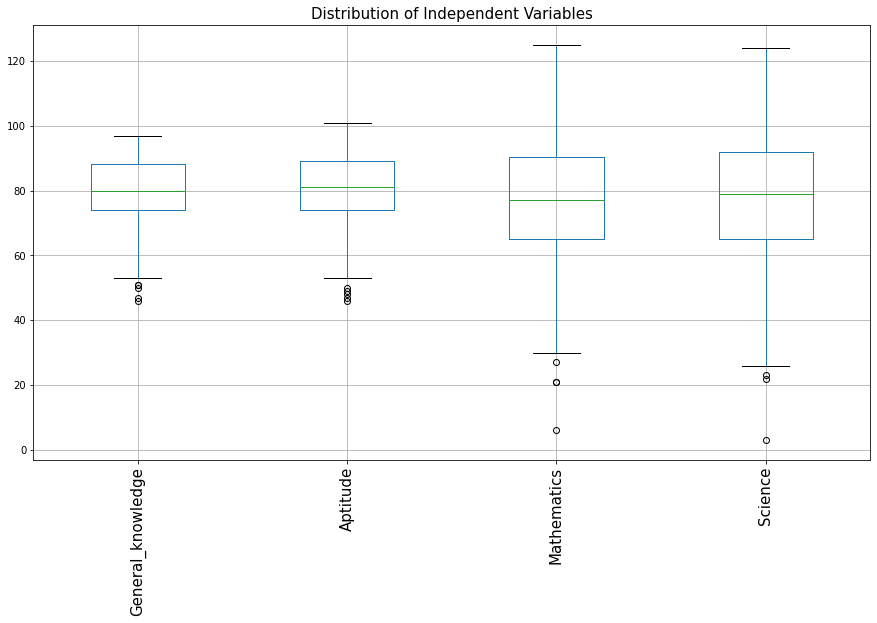

In [24]:
# boxplot of independent variables

# set the plot size using figure()
# pass width and height in inches to 'figsize' 
plt.figure(figsize = (15,8))

# use 'loc[]' to select the variables
df.loc[:,['General_knowledge', 'Aptitude', 'Mathematics', 'Science']].boxplot()

# set plot label
# set text size using 'fontsize'
plt.title('Distribution of Independent Variables', fontsize = 15)

# xticks() returns the x-axis ticks
# 'rotation = vertical' rotates the x-axis labels vertically
plt.xticks(rotation = 'vertical', fontsize = 15)

# display the plot
plt.show()

In [25]:
#from the visualzation we can see some of them have outliers so let's work on it and find outliers. 
# calculate the first quartile
Q1 = df.quantile(0.25)

# calculate the third quartile
Q3 = df.quantile(0.75)

# The Interquartile Range (IQR) is defined as the difference between the third and first quartile
# calculate IQR for each numeric variable
IQR = Q3 - Q1

df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# check the shape of the data
df.shape

(89, 5)

In [55]:
 ##earlier the shape of the date was (96, 5) and after outliers treatment it is now (89, 5)

<AxesSubplot:>

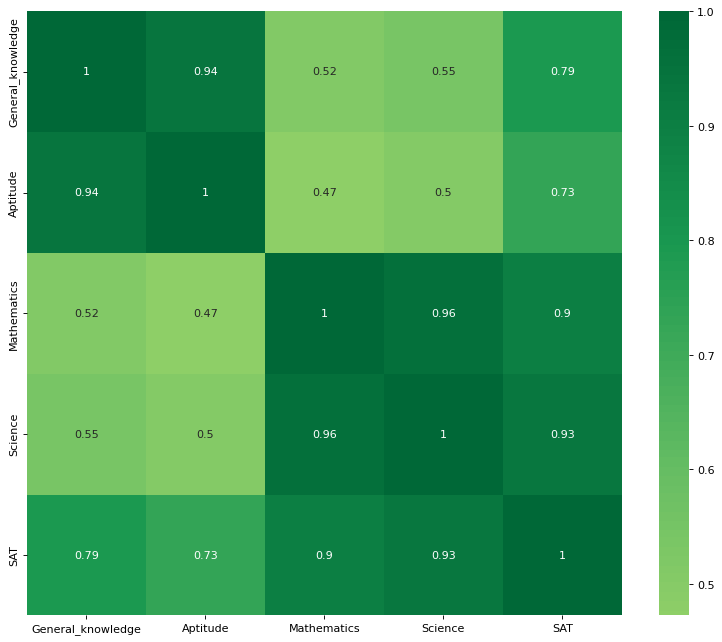

In [56]:
plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

Interpretation: The above heatmap, show the variables having a strong positive/negative correlation. The variables with dark shade represent the strong positive correlation.

<Figure size 800x640 with 0 Axes>

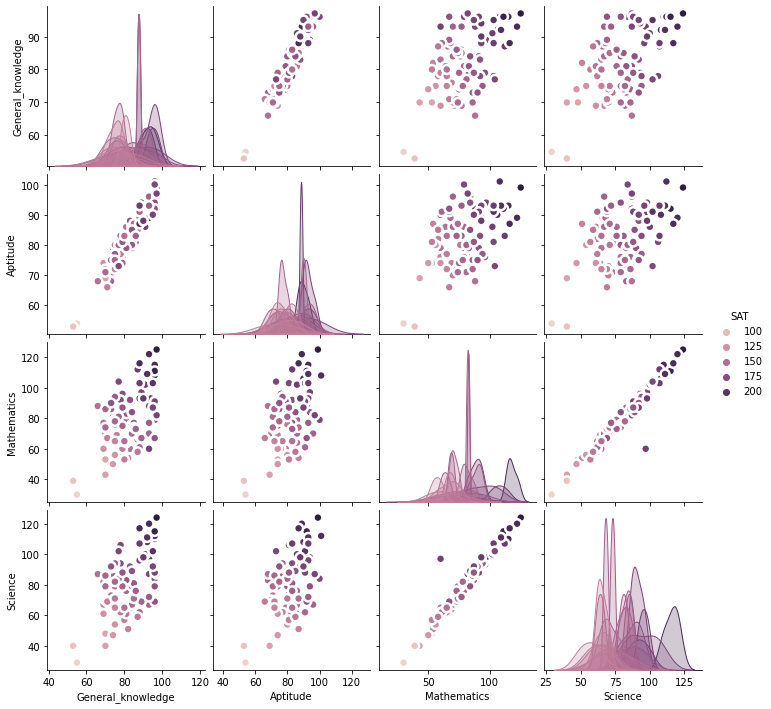

In [57]:
plt.figure(figsize=(10,8), dpi= 80)
sns.pairplot(df, kind="scatter", hue="SAT", plot_kws=dict(s=80, edgecolor="white", linewidth=2.5))
plt.show()

In [29]:
#importig liabararies for the model.
# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodel to perform linear regression
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.compat import lzip
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.gofplots import qqplot
from statsmodels.stats.anova import anova_lm
from statsmodels.formula.api import ols
from statsmodels.tools.eval_measures import rmse

# import various functions from scipy
from scipy import stats
from scipy.stats import shapiro

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

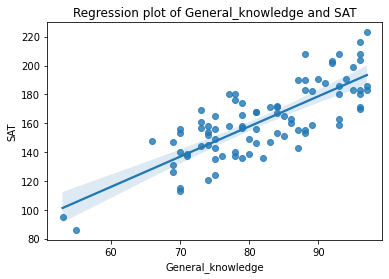

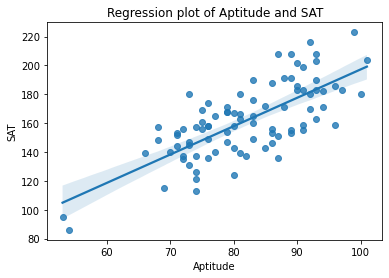

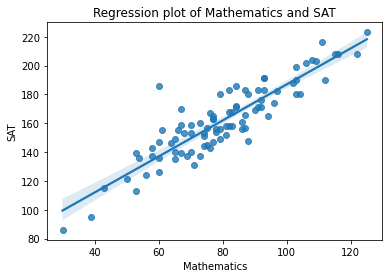

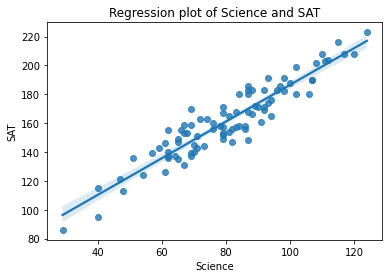

In [53]:
variables = ['General_knowledge', 'Aptitude', 'Mathematics','Science']

for var in variables:
    plt.figure() 
    # Creating a rectangle (figure) for each plot
    # Regression Plot also by default includes
    # best-fitting regression line
    # which can be turned off via `fit_reg=False`
    sns.regplot(x=var, y='SAT', data=df).set(title=f'Regression plot of {var} and SAT');

In [31]:
##from the graph we can see we have a strong linear relations with the marks and SAT.
#now creating the model.

In [32]:
#diving the dependent and indepent variables.
features = ['General_knowledge', 'Aptitude', 'Mathematics','Science']
target = 'SAT'
y= df[target]
X=df[features]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = 0.3)

# check the dimensions of the train & test subset using 'shape'
# print dimension of train set
print('X_train', X_train.shape)
print('y_train', y_train.shape)

#print dimention ofthe test
print('X_test', X_train.shape)
print('y_test', y_train.shape)

X_train (62, 4)
y_train (62,)
X_test (62, 4)
y_test (62,)


In [34]:
##Buliding linear model using OLS method

In [35]:
X_train.head()

,General_knowledge,Aptitude,Mathematics,Science
70,75,77,94,94
67,74,74,50,47
72,77,80,81,84
37,84,79,91,90
43,80,81,53,57


In [36]:
# convert the X_train to DataFrame
X_train = pd.DataFrame(X_train)

# insert a column of intercept to 'X_train_slr'
# create an array of ones with length equal to the total number of observations
c = np.ones(X_train.shape[0])

# A design matrix is a matrix of observations of independent variables whose first column is of ones
# If there are 'm' observations and 'n' variables, then the dimension of a design matrix is m * (n+1) 

# add the intercept 
# pass location index of intercept to the parameter 'loc'
# pass column name to the parameter 'column'
# pass the column value to the parameter 'value'
X_train.insert(loc = 0, column = 'intercept', value = c)

# display the first five rows of design matrix
X_train.head()

,intercept,General_knowledge,Aptitude,Mathematics,Science
70,1.0,75,77,94,94
67,1.0,74,74,50,47
72,1.0,77,80,81,84
37,1.0,84,79,91,90
43,1.0,80,81,53,57


In [37]:
# building a model on the train dataset with an intercept
# fit() is used to fit the OLS model
LR_model = sm.OLS(y_train, X_train).fit()

# print the summary output
LR_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    SAT   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     1083.
Date:                Fri, 19 May 2023   Prob (F-statistic):           5.05e-53
Time:                        17:01:48   Log-Likelihood:                -152.80
No. Observations:                  62   AIC:                             315.6
Df Residuals:                      57   BIC:                             326.2
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
intercept            -5.8987      3.550     -1.662      0.102     -13.007       1.210
General_knowledge     1.1785      0.121      9.702      0.000       0.935       1.422
Aptitude             -0.1012      0.120     -0.840      0.404      -0.342       0.140
Mathematics           0.0767      0.068      1.124      0.266      -0.060       0.213
Science               0.9113      0.069     13.170      0.000       0.773       1.050
==============================================================================
Omnibus:                        4.427   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.109   Jarque-Bera (JB):                2.238
Skew:                           0.173   Prob(JB):                        0.327
Kurtosis:                       2.136   Cond. No.                     1.54e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##lets summaries the output of the model.
'''first we will check for the Prob (F-statistic):	5.05e-53.let's frame the H0 and H1
H0 :- model is insigificant
H1:- model is signigicant
here Prob (F-statistic):	5.05e-53 so amything etopower is 0
so here 0<0.05, so we reject H0 so we accept H1
It means our model is significant'''

The Durbin-Watson test is used to check the autocorrelation between the residuals.

If the Durbin-Watson test statistic is near to 2: no autocorrelation
If the Durbin-Watson test statistic is between 0 and 2: positive autocorrelation
If the Durbin-Watson test statistic is between 2 and 4: negative autocorrelation

The summary output shows that the value of the test statistic is near to 2 (= 1.997) which means there is no autocorrelation.

The Jarque-Bera (JB): test is used to check the normality of the residuals. Here, the p-value of the test is more  than 0.05; that implies the residuals are normally distributed.

Also, the 'Cond. No' (1.54e+03) represents the Condition Number (CN) that is used to check the multicollinearity.

If CN < 100: no multicollinearity.
If CN is between 100 and 1000: moderate multicollinearity
If CN > 1000: severe multicollinearity

Thus, it can be seen that there is severe multicollinearity in the data.

In [38]:
print(y_train.head())

70    165
67    121
72    158
37    171
43    139
Name: SAT, dtype: int64


In [39]:
# predict the Total_Reimbursement using 'predict()' on training data
y_train_pred = LR_model.predict(X_train)

# display the first five predicted values 
y_train_pred.head()

70    167.568373
67    120.486888
72    159.511602
37    174.096782
43    136.192788
dtype: float64

Now we have actual and predicted values of the target variable for training dataset (y_train_slr and y_train_pred respectively)

In [47]:
pred_df=pd.DataFrame({'Actual Value':y_train,'Predicted Value':y_train_pred,'Difference':y_train-y_train_pred})
print(pred_df)

    Actual Value  Predicted Value  Difference
70           165       167.568373   -2.568373
67           121       120.486888    0.513112
72           158       159.511602   -1.511602
37           171       174.096782   -3.096782
43           139       136.192788    2.807212
..           ...              ...         ...
81           172       172.041642   -0.041642
11           113       116.914419   -3.914419
77            95        90.641151    4.358849
14           140       138.672012    1.327988
40           156       156.174348   -0.174348

[62 rows x 3 columns]


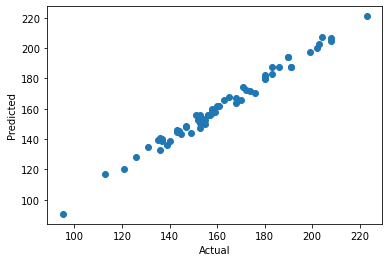

In [52]:
plt.scatter(y_,y_train_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

We can see there is no difference in the actual and predicted. 

<AxesSubplot:xlabel='SAT'>

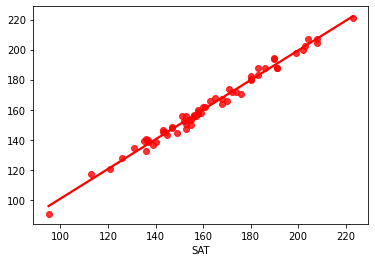

In [50]:
sns.regplot(x=y_train,y=y_train_pred,ci=None,color ='red')

A regression plot is useful to understand the linear relationship between two parameters. It creates a regression line in-between those parameters and then plots a scatter plot of those data points.